In [1]:
import pandas as pd
df=pd.read_excel("DATA.xlsx")

In [2]:
# Example: Renaming multiple columns
df.rename(columns={
    'villageId': 'Village ID',
    'villageName': 'Village Name',
    'shg': 'SHG',
    'member': 'Total Members',
    'scMember':'SC Members',
    'stMember':'ST Members',
    'obcMember':'OBC Members',
    'otherMember':'General Members',
    'lgdVillage':'LGD Village',
    'stateId':'State ID',
    'lgdState':'LGD State',
    'fy':'Financial Year',
    'stateName':'State',
    'districtId':'District ID',
    'districtName':'District Name',
    'blockId':'Block ID',
    'lgdBlock':'LGD Block',
    'blockName':'Block Name',
    'panchayatId':'Panchayat ID',
    'lgdPanchayat':'LGD Panchayat',
    'panchayatName':'Panchayat Name'
}, inplace=True)


In [3]:
df.to_excel('SHG_Dataset.xlsx', index=False)

In [4]:
df['SHG Status'] = df['SHG'].apply(lambda x: 'With SHG' if x > 0 else 'Without SHG')

df['SHG Members Status'] = df['Total Members'].apply(lambda x: 'Active' if x > 0 else 'Inactive')

def get_shg_range(x):
    if x <= 2:
        return '0-2'
    elif x <= 5:
        return '3-5'
    elif x <= 7:
        return '5-7'
    else:
        return '7+'

df['SHG Range'] = df['SHG'].apply(get_shg_range)

df.to_excel('SHG_Dataset_Updated_With_Status.xlsx', index=False)

print("New columns added successfully!")


New columns added successfully!


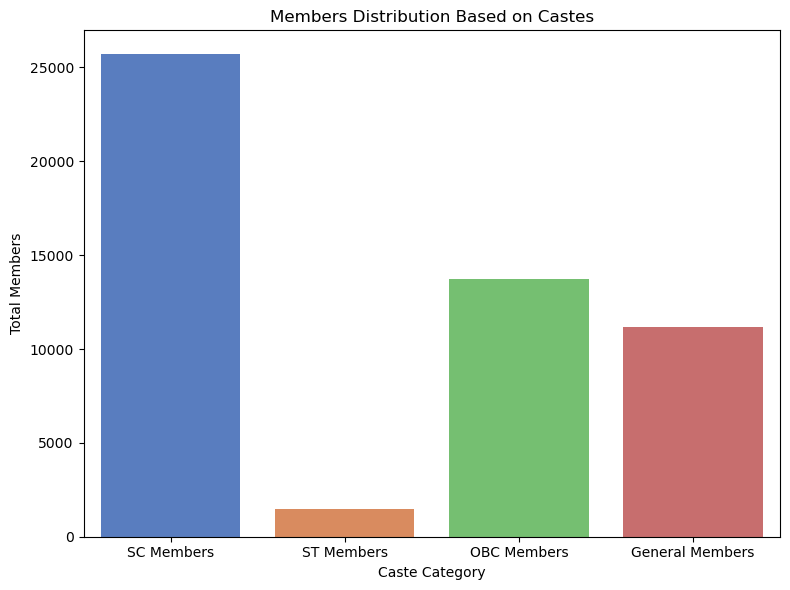

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
caste_counts = {
    'SC Members': df['SC Members'].sum(),
    'ST Members': df['ST Members'].sum(),
    'OBC Members': df['OBC Members'].sum(),
    'General Members': df['General Members'].sum()
}
caste_data = pd.DataFrame({
    'Caste': list(caste_counts.keys()),
    'Members': list(caste_counts.values())
})
plt.figure(figsize=(8, 6))
sns.barplot(data=caste_data, x='Caste', y='Members',hue='Caste',palette='muted',legend=False)
plt.title('Members Distribution Based on Castes')
plt.ylabel('Total Members')
plt.xlabel('Caste Category')
plt.tight_layout()
plt.show()

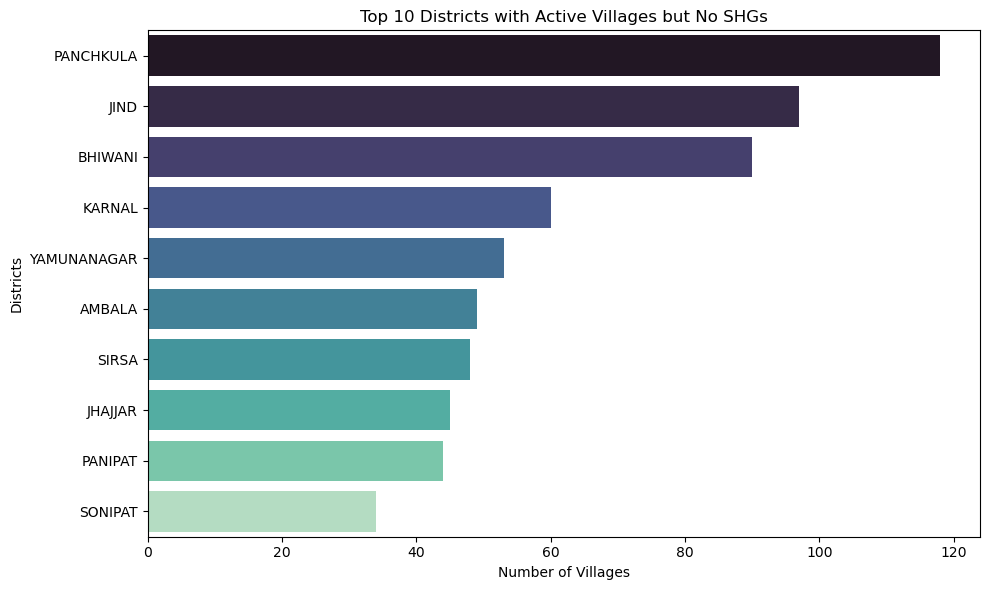

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_active_no_shg = df[(df['SHG Members Status'] == 'Active') & (df['SHG Status'] == 'Without SHG')]

top10 = df_active_no_shg.groupby('District Name').size().sort_values(ascending=False).head(10).reset_index()
top10.columns = ['District Name', 'Village Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Village Count', y='District Name', hue='District Name', palette='mako', legend=False)
plt.title('Top 10 Districts with Active Villages but No SHGs')
plt.xlabel('Number of Villages')
plt.ylabel('Districts')
plt.tight_layout()
plt.show()


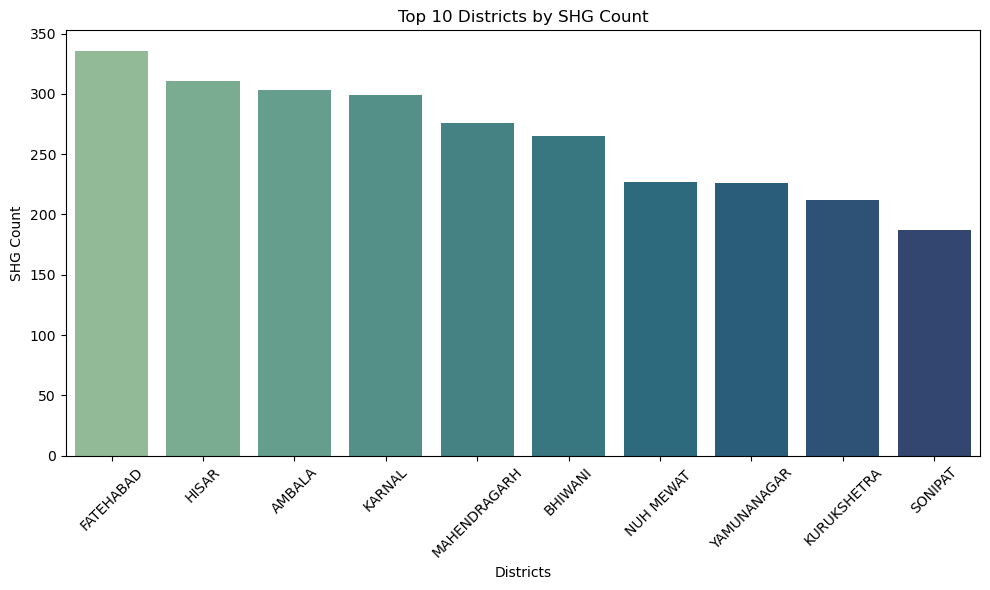

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top10_shg_districts = df.groupby('District Name')['SHG'].sum().sort_values(ascending=False).head(10).reset_index()
top10_shg_districts.columns = ['District Name', 'SHG Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_shg_districts, x='District Name', y='SHG Count', hue='District Name', palette='crest', legend=False)
plt.title('Top 10 Districts by SHG Count')
plt.xlabel('Districts')
plt.ylabel('SHG Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


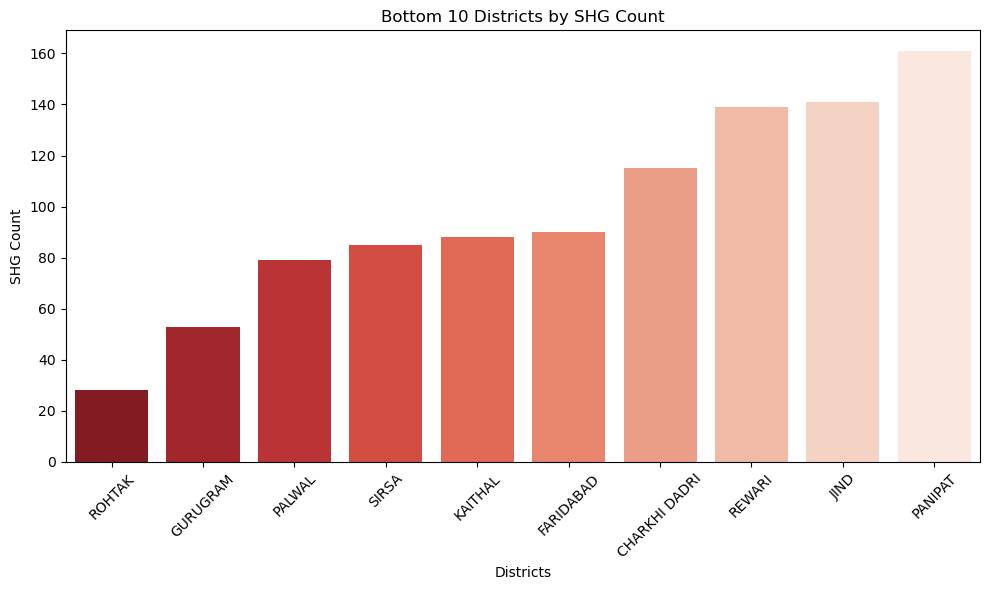

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

bottom10_shg_districts = df.groupby('District Name')['SHG'].sum().sort_values(ascending=True).head(10).reset_index()
bottom10_shg_districts.columns = ['District Name', 'SHG Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10_shg_districts, x='District Name', y='SHG Count', hue='District Name', palette='Reds_r', legend=False)
plt.title('Bottom 10 Districts by SHG Count')
plt.xlabel('Districts')
plt.ylabel('SHG Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

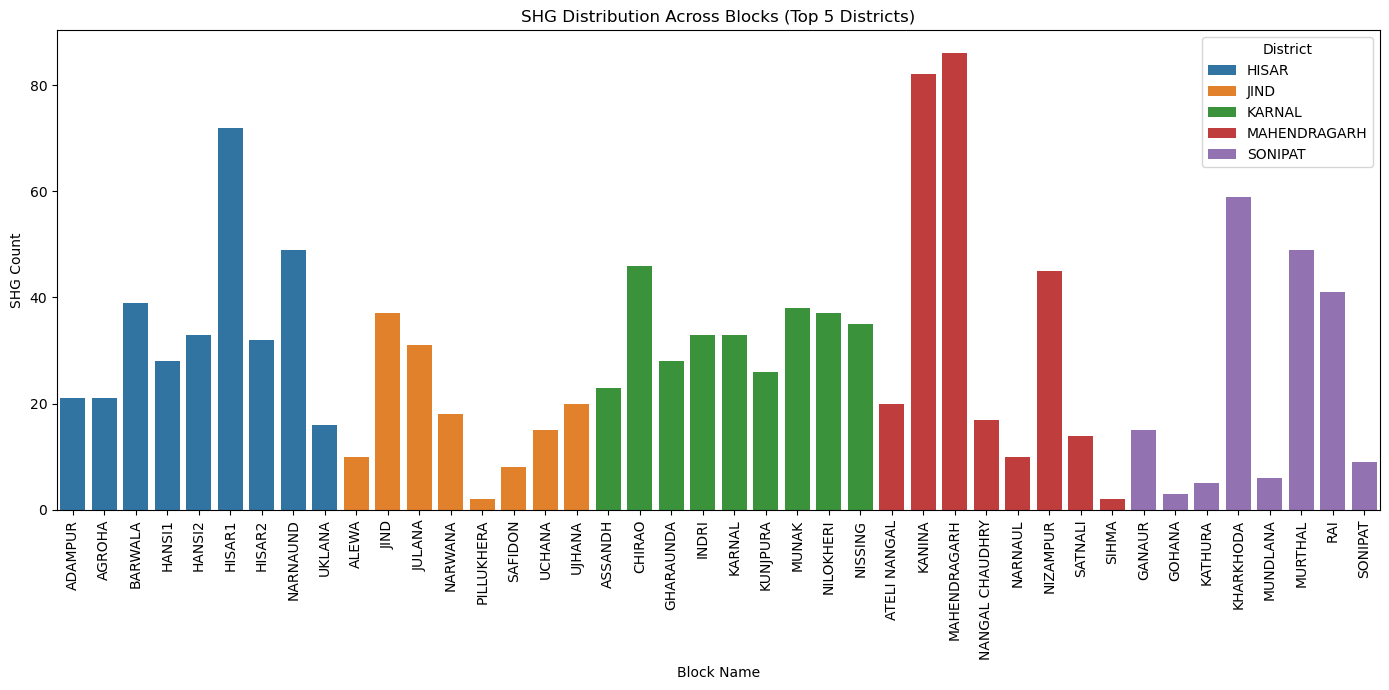

In [9]:
# Group by District and Block to get SHG counts
district_block_shg = df.groupby(['District Name', 'Block Name'])['SHG'].sum().reset_index()

# Optional: Filter to a few districts to keep chart readable
selected_districts = district_block_shg['District Name'].value_counts().head(5).index.tolist()
filtered_df = district_block_shg[district_block_shg['District Name'].isin(selected_districts)]

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_df, x='Block Name', y='SHG', hue='District Name')
plt.title('SHG Distribution Across Blocks (Top 5 Districts)')
plt.xlabel('Block Name')
plt.ylabel('SHG Count')
plt.xticks(rotation=90)
plt.legend(title='District')
plt.tight_layout()
plt.show()



<Figure size 600x600 with 0 Axes>

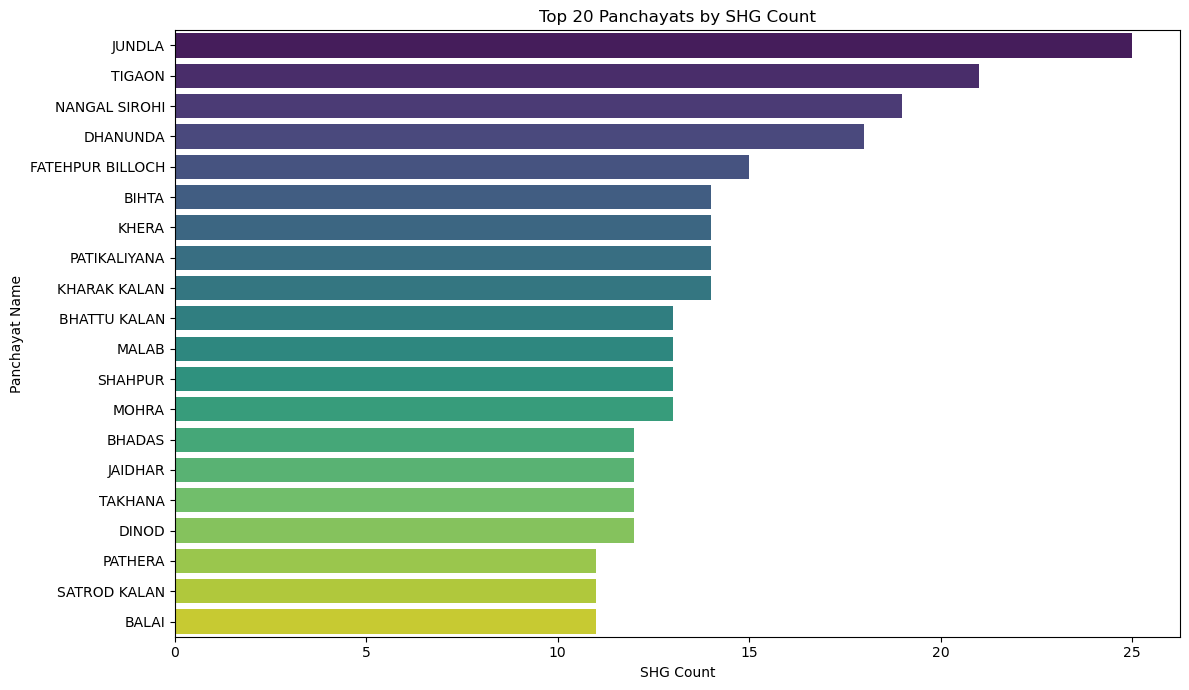

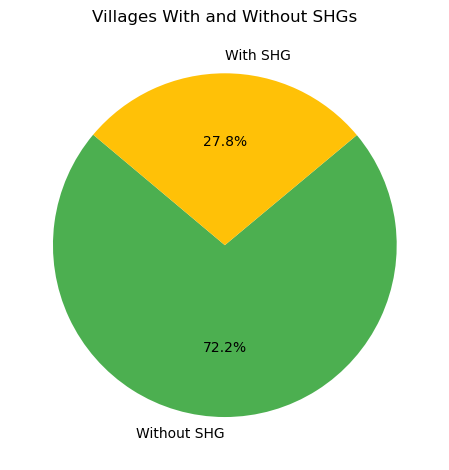

In [11]:
# Create a new column to mark villages with or without SHGs
df['SHG Presence'] = df['SHG'].apply(lambda x: 'With SHG' if x > 0 else 'Without SHG')

# Count villages by SHG presence
village_counts = df['SHG Presence'].value_counts()

# Plotting as Pie Chart
plt.figure(figsize=(6, 6))
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Panchayat and get SHG count
top20_panchayats = df.groupby('Panchayat Name')['SHG'].sum().sort_values(ascending=False).head(20)

# Prepare DataFrame for Seaborn compatibility with hue
top20_df = top20_panchayats.reset_index()
top20_df.columns = ['Panchayat Name', 'SHG']

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=top20_df, x='SHG', y='Panchayat Name', hue='Panchayat Name', palette='viridis', legend=False)
plt.title('Top 20 Panchayats by SHG Count')
plt.xlabel('SHG Count')
plt.ylabel('Panchayat Name')
plt.tight_layout()
plt.show()

colors = ['#4CAF50', '#FFC107']
plt.pie(village_counts, labels=village_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Villages With and Without SHGs')
plt.tight_layout()
plt.show()


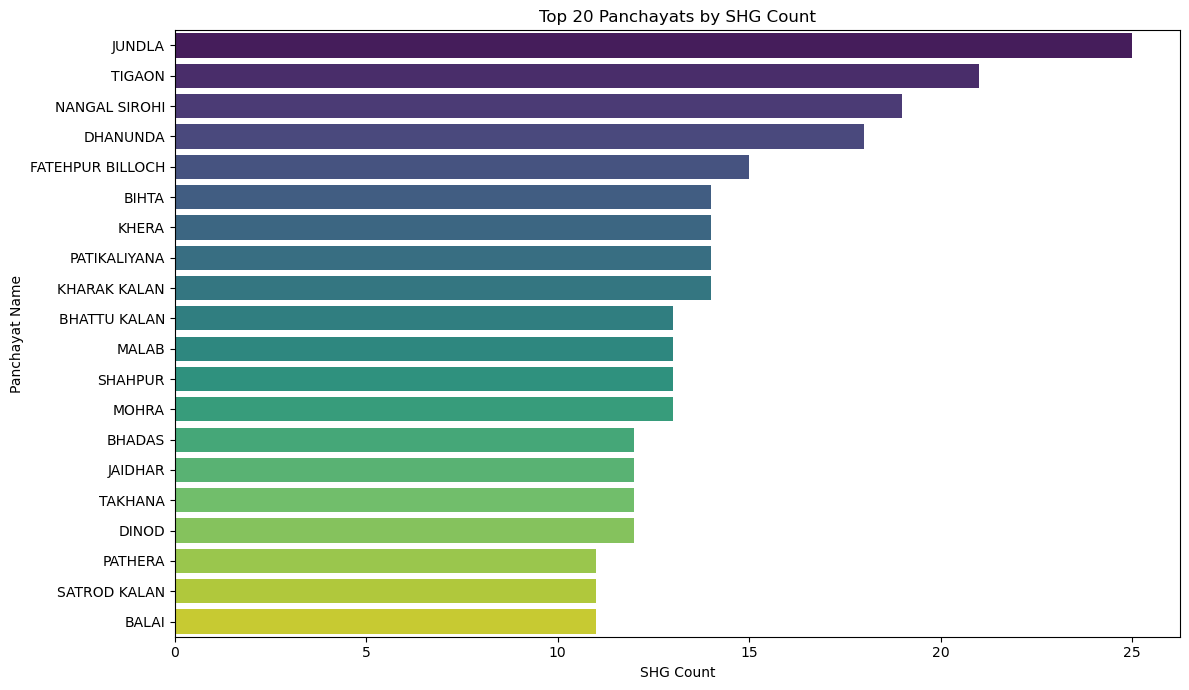

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Panchayat and get SHG count
top20_panchayats = df.groupby('Panchayat Name')['SHG'].sum().sort_values(ascending=False).head(20)

# Prepare DataFrame for Seaborn compatibility with hue
top20_df = top20_panchayats.reset_index()
top20_df.columns = ['Panchayat Name', 'SHG']

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=top20_df, x='SHG', y='Panchayat Name', hue='Panchayat Name', palette='viridis', legend=False)
plt.title('Top 20 Panchayats by SHG Count')
plt.xlabel('SHG Count')
plt.ylabel('Panchayat Name')
plt.tight_layout()
plt.show()


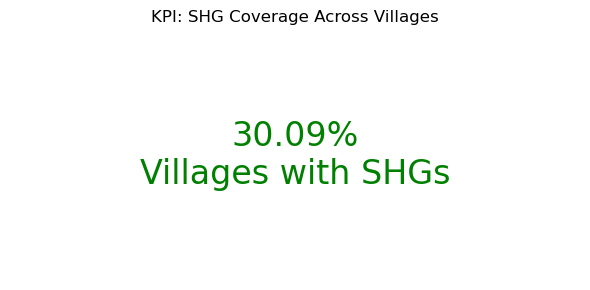

In [13]:
# Calculate total number of villages
total_villages = df['Village Name'].nunique()

# Villages with at least one SHG
villages_with_shg = df[df['SHG'] > 0]['Village Name'].nunique()

# Calculate percentage
coverage_percentage = (villages_with_shg / total_villages) * 100

# Display the KPI as text
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, f'{coverage_percentage:.2f}%\nVillages with SHGs',
         fontsize=24, color='green', ha='center', va='center')
plt.axis('off')
plt.title('KPI: SHG Coverage Across Villages')
plt.tight_layout()
plt.show()


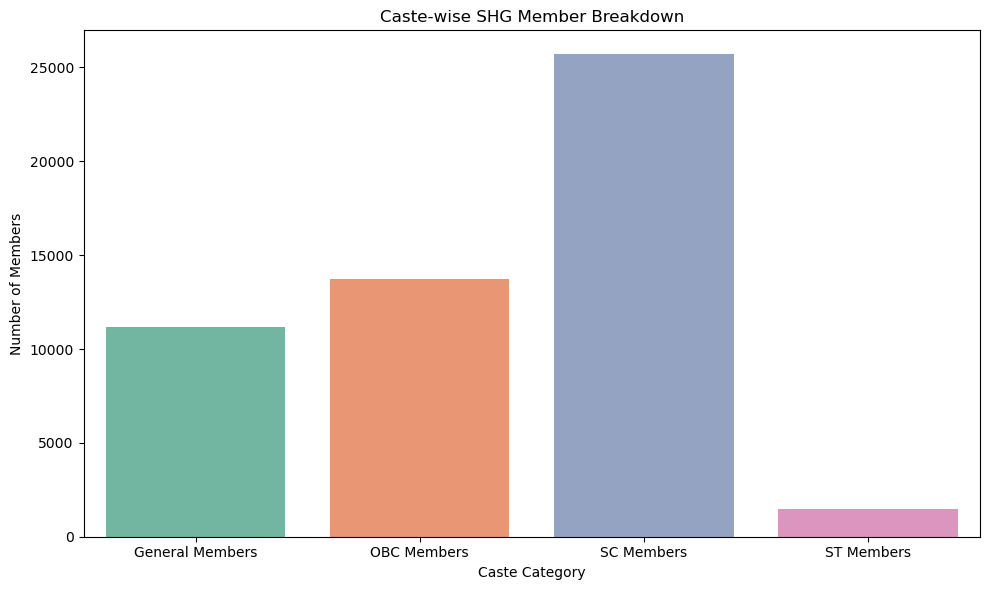

In [14]:
caste_columns = ['General Members', 'OBC Members', 'SC Members', 'ST Members']  # Replace with actual column names
caste_totals = df[caste_columns].sum()

caste_df = caste_totals.reset_index()
caste_df.columns = ['Caste', 'Member Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=caste_df, x='Caste', y='Member Count', hue='Caste', palette='Set2', legend=False)
plt.title('Caste-wise SHG Member Breakdown')
plt.xlabel('Caste Category')
plt.ylabel('Number of Members')
plt.tight_layout()
plt.show()


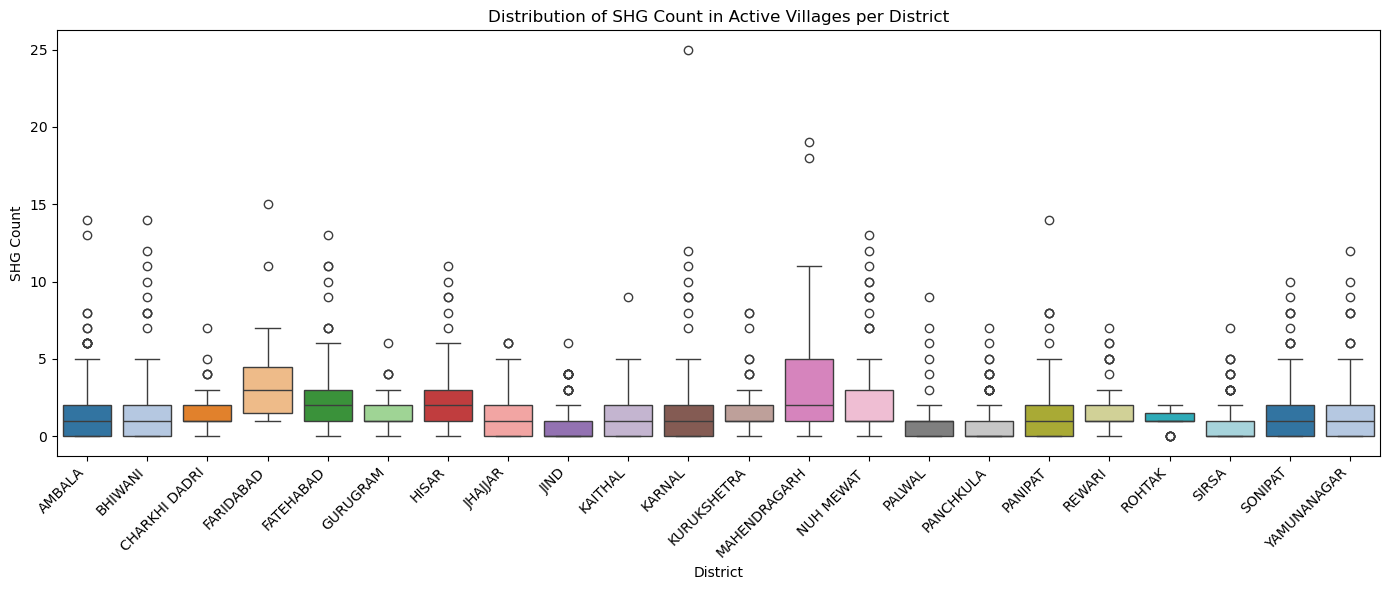

In [17]:
active_df = df[df['SHG Members Status'].str.lower().str.strip() == 'active'].copy()

active_df['SHG'] = pd.to_numeric(active_df['SHG'], errors='coerce')

# Set figure size and style
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=active_df,
    x='District Name',
    y='SHG',
    hue='District Name',
    palette='tab20',
    legend=False
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of SHG Count in Active Villages per District')
plt.xlabel('District')
plt.ylabel('SHG Count')
plt.tight_layout()
plt.show()
